# **Retail Banking Customer Churn Prediction**

## **Business Problem**

### Description:

Customer churn is a business term known as customer agitation. In business, when customers are dissatisfied with the service or product that is provided, attrition will occur. Customer churn hurts businesses since it can result in large premium losses, decreased profit margins, and possibly lost referral business from loyal clients. Hence customer retention is important for businesses.

Data collection and analysis allows us to identify customers who may be about to leave a business, thereby focusing on customer retention rather than attracting new clients.    

Here, we use different machine learning models such as k-nearest neighbors, logistic regression, decision tree , random forest, and support vector machine to predict the churn.

### Problem Statement:

Build models to predict the customer churn and find out the best one with highest prediction accuracy

Source :https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [1]:
# Importing necessary packages and library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings                             
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataframe
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
#Check for instances and attributes count
df.shape

(10000, 12)

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis

In [5]:
#Descriptive Summary of the dataset
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
# Checking for missing data
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
#Dropping customer_id attribute as it is unique for each observation and not useful for prediction
df.drop(["customer_id"],axis=1,inplace = True)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# Checking for any duplicate values
df.duplicated().sum()

0

### Data Visualisation

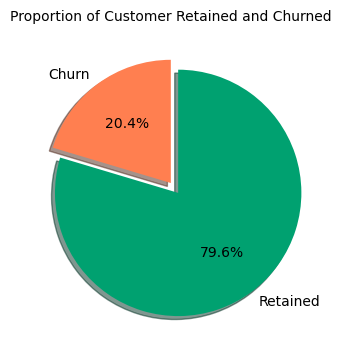

In [10]:
labels = 'Churn', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
colors = ['#FF7F50', '#00A170']
fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)
plt.title("Proportion of Customer Retained and Churned", size = 10)
plt.show()

We can see nearly 20% of the customers are likely to churn.

<Axes: >

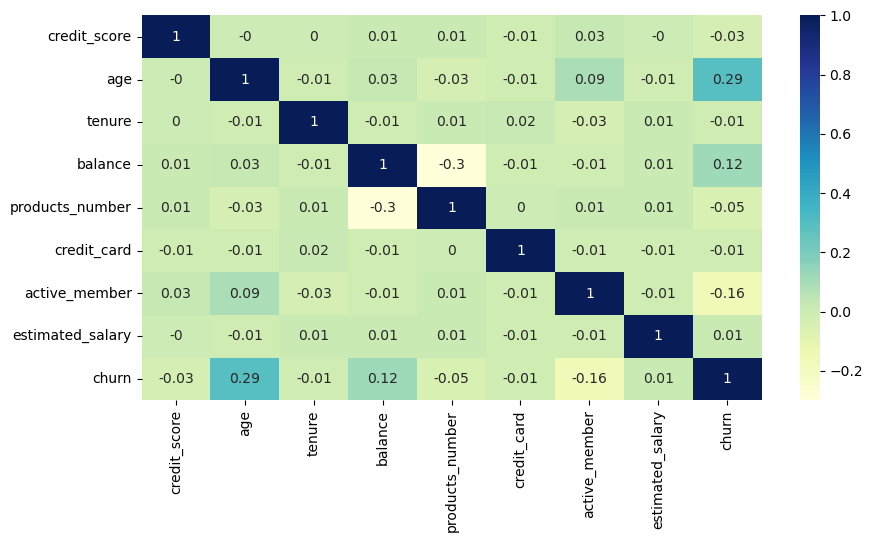

In [11]:
#Finding the correlation between the variables
df_corr = df.corr().round(2)
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot=True,cmap='YlGnBu')

We can observe age has higher correlation to target

### Categorical Variables

<Axes: xlabel='churn', ylabel='count'>

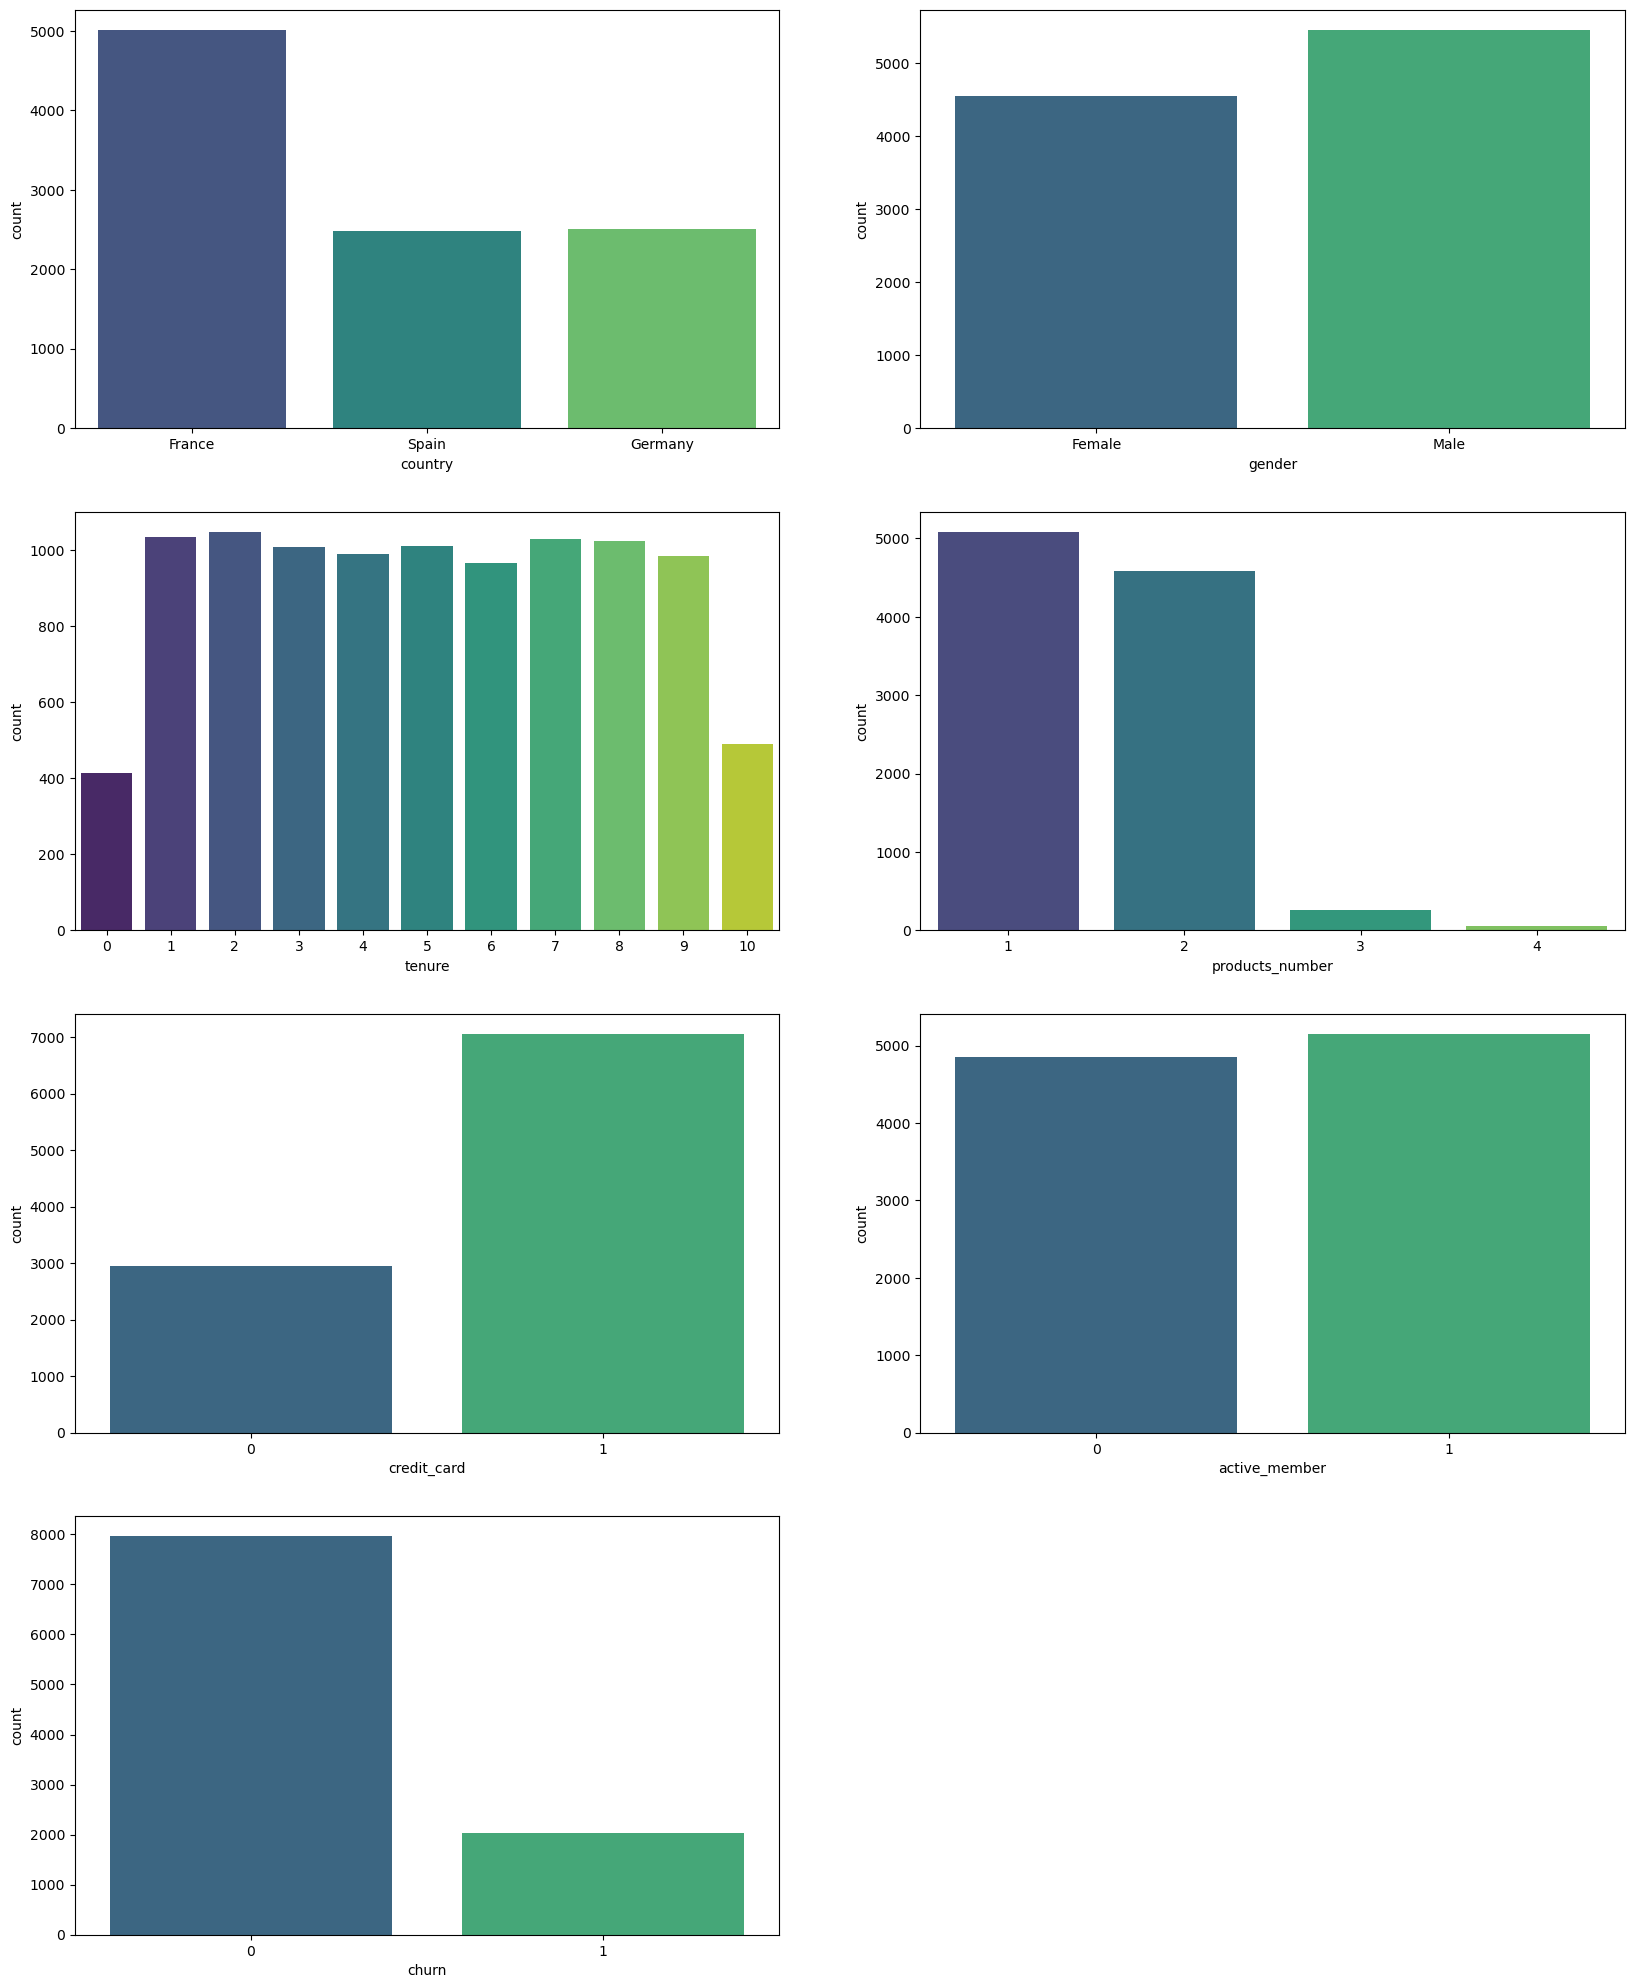

In [12]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
sns.countplot(x = 'country', palette= 'viridis',data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='viridis', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='viridis', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', palette='viridis', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='viridis', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='viridis', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='viridis', data = df)

Looking at our categorical variables individually, we were able to verify that the French population is high, we have the male population slightly greater than the female, we almost have a good distribution of the tenure variable , looking at the variable product_number we can see that we have a predominance in products 1 and 2, we can also see that most transactions are made by credit card, when we look at our target variable we can see that we have a considerable number of negative values.

### Continuous variable

<Axes: xlabel='estimated_salary', ylabel='Count'>

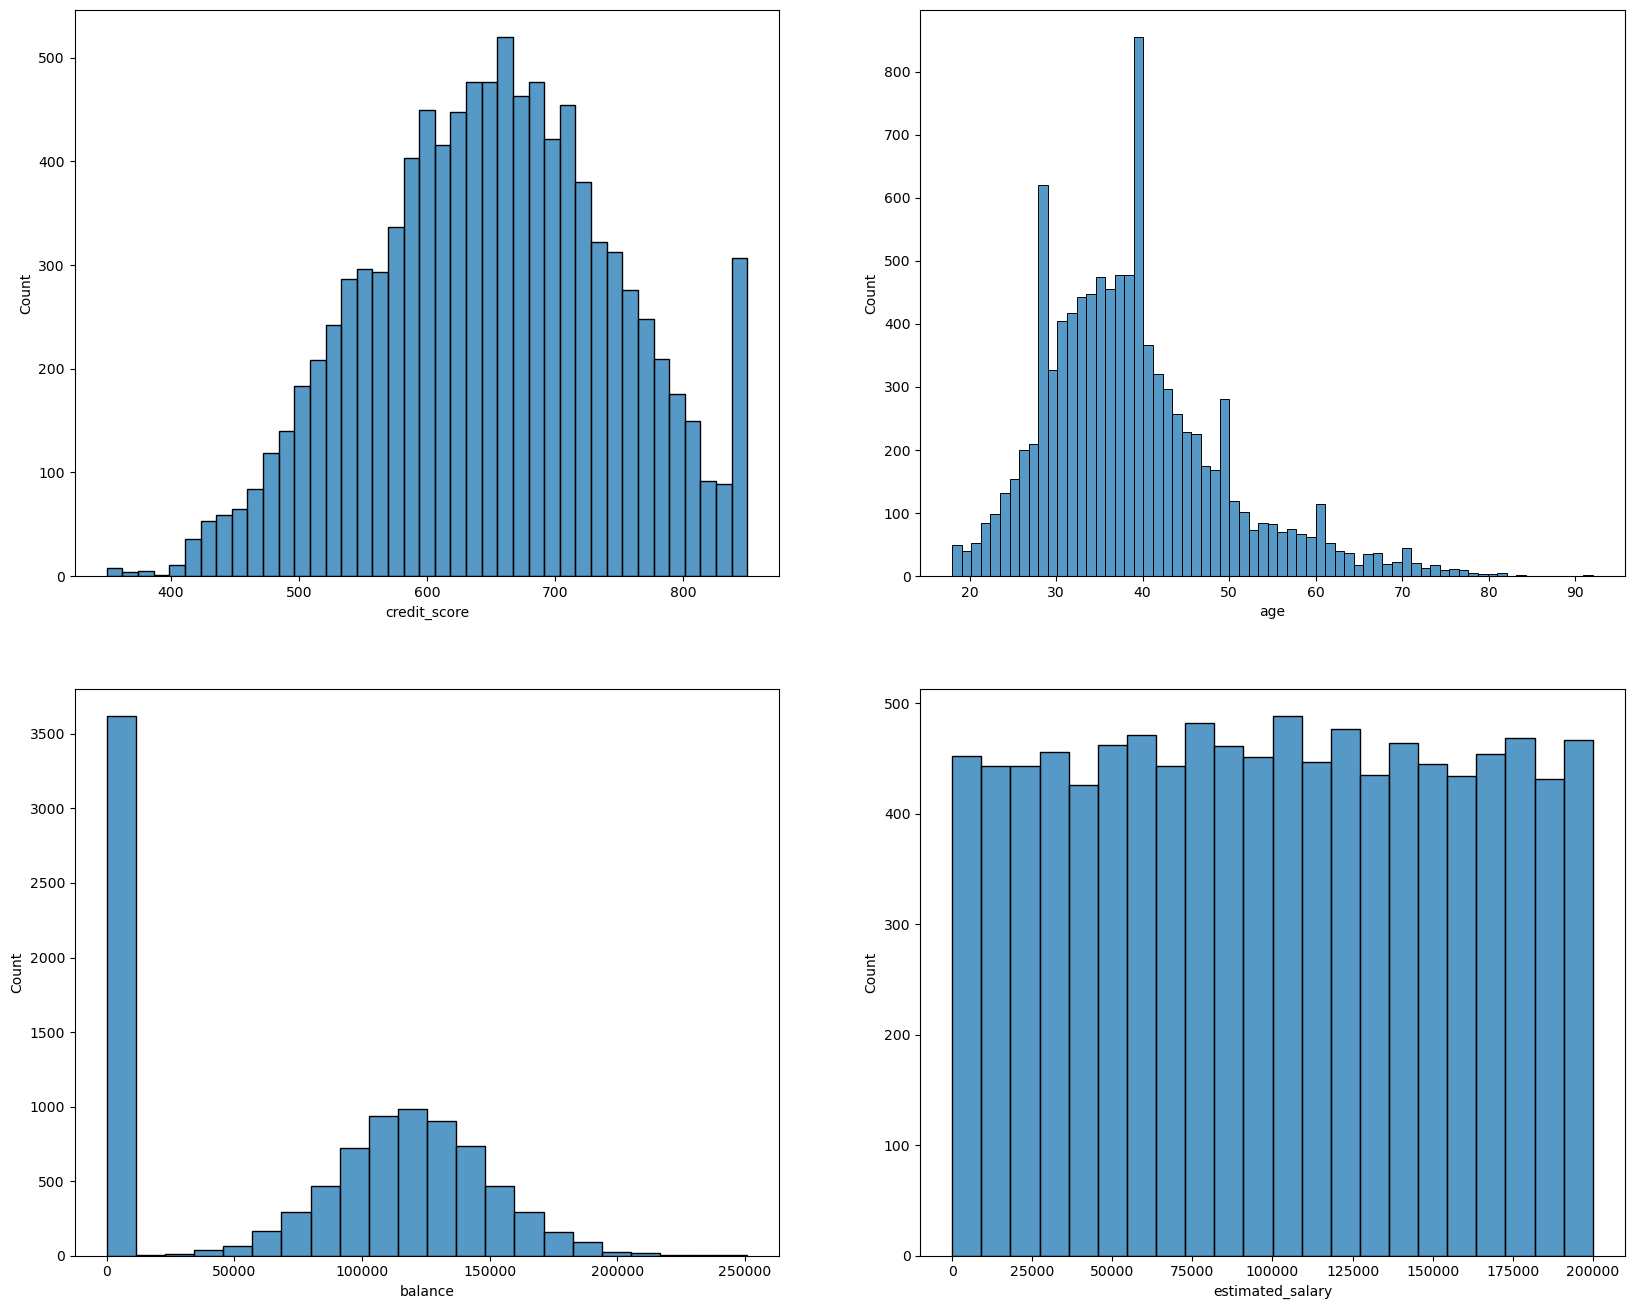

In [13]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
sns.histplot(df['credit_score'])

plt.subplot(3,2,2)
sns.histplot(df['age'])

plt.subplot(3,2,3)
sns.histplot(df['balance'])

plt.subplot(3,2,4)
sns.histplot(df['estimated_salary'])

Looking at our continuous variables, we can see that our credit score variable is practically a normal distribution, most people in our base are between 20 and 40 years old, we have a large number of people who have no value on the balance sheet, and when we look at the variable salary we have well distributed values.

### Bivariate Analysis

Text(0.5, 1.0, 'Total Churn Vs Active Member')

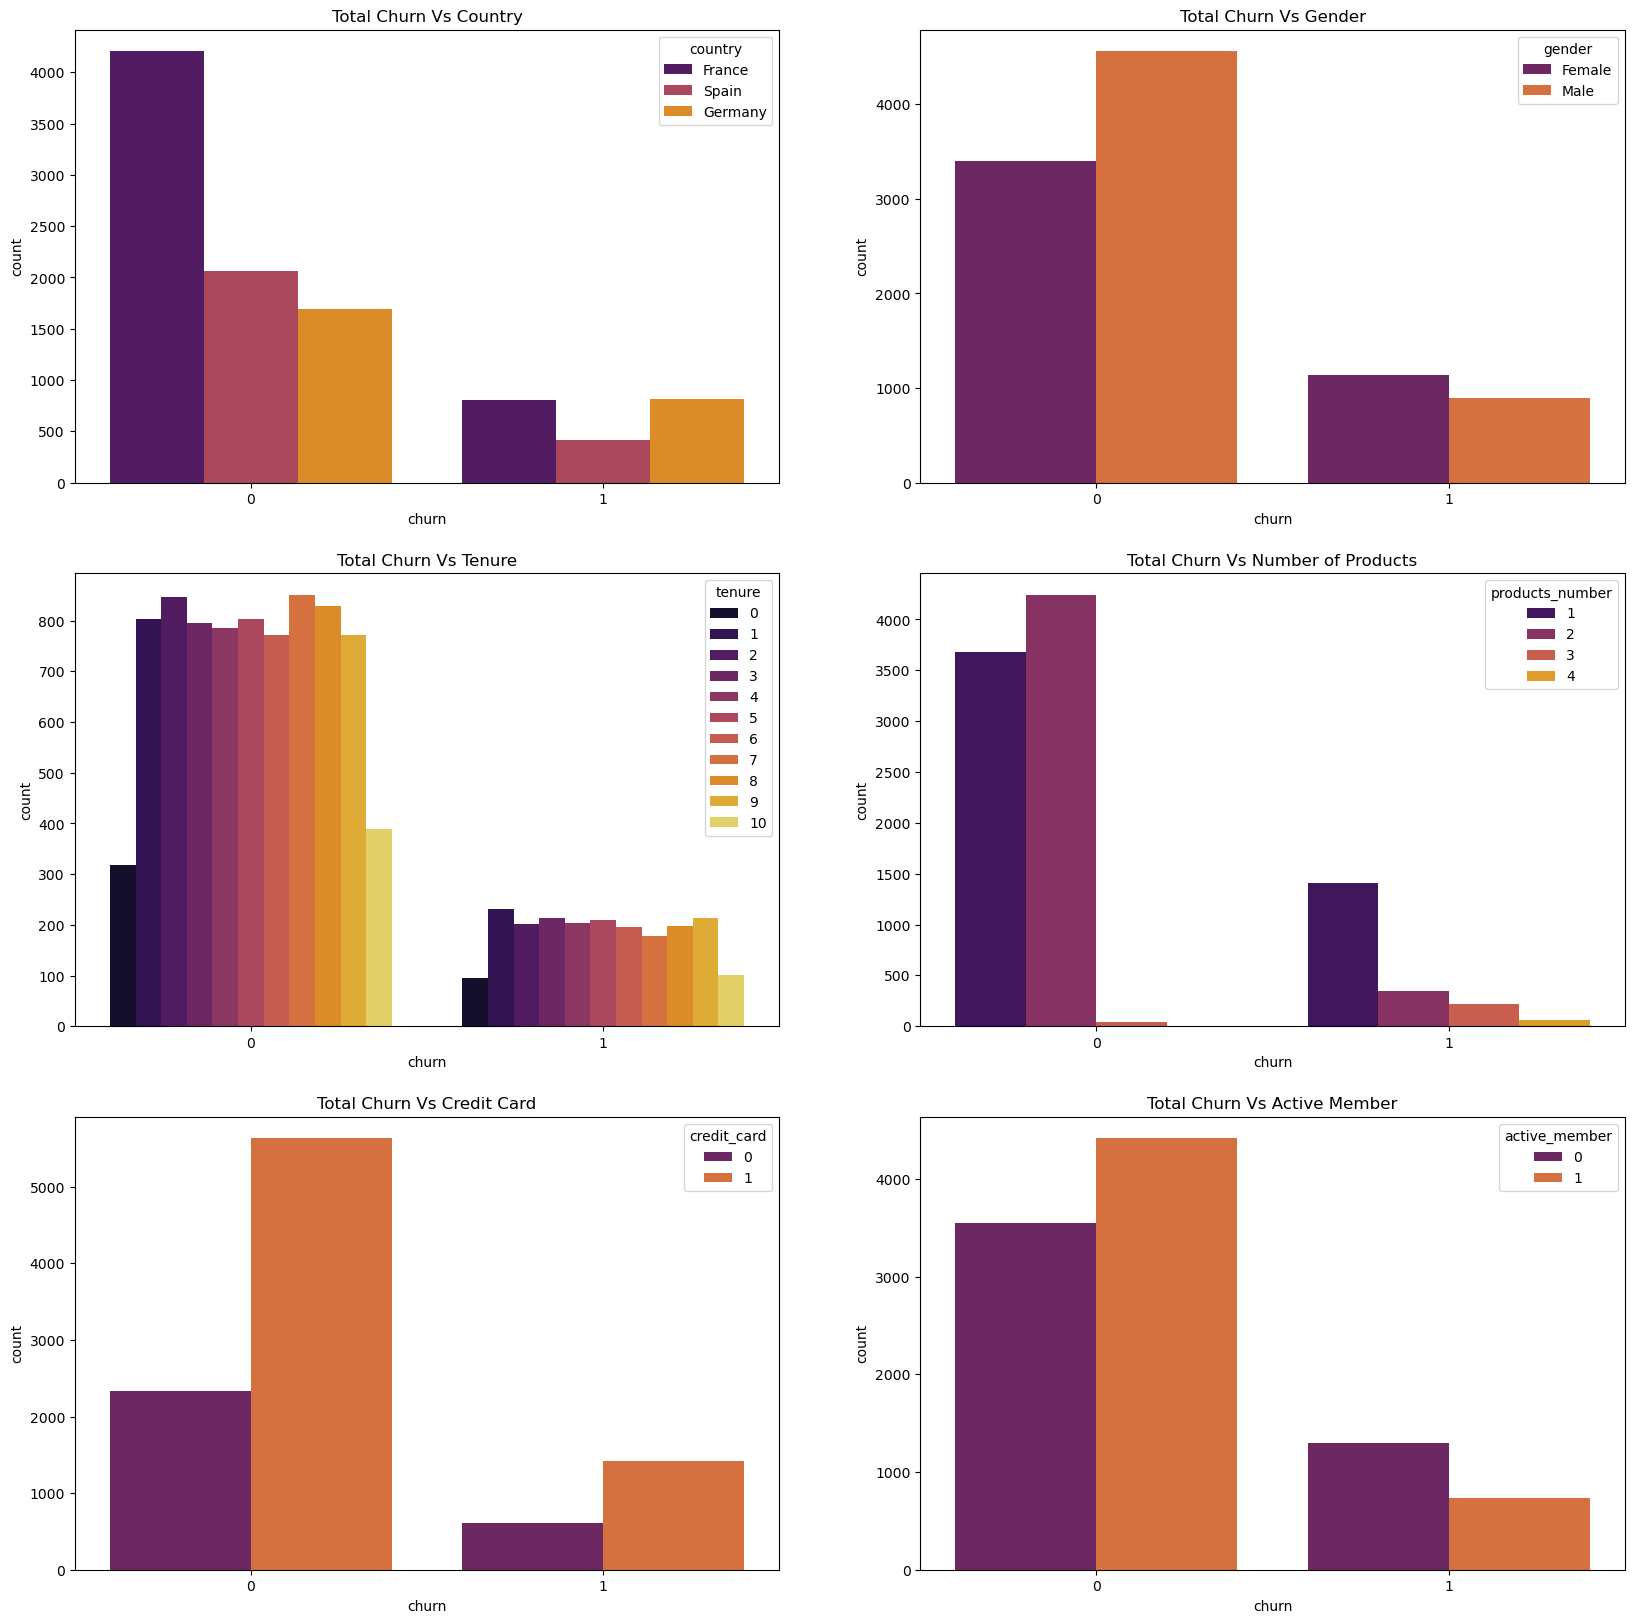

In [14]:
#categorical hue
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='inferno', data = df)
plt.title("Total Churn Vs Country")

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='inferno', data = df)
plt.title("Total Churn Vs Gender")

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='inferno', data = df)
plt.title("Total Churn Vs Tenure")

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'products_number', palette='inferno', data = df)
plt.title("Total Churn Vs Number of Products")

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='inferno', data = df)
plt.title("Total Churn Vs Credit Card")

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='inferno', data = df)
plt.title("Total Churn Vs Active Member")

In our bivariate analysis we were able to get some insights.The factors country, gender and tenure are well distributed in churn values. People with a single product,credit card and not an active member are more likely to churn.

<Axes: xlabel='churn', ylabel='credit_score'>

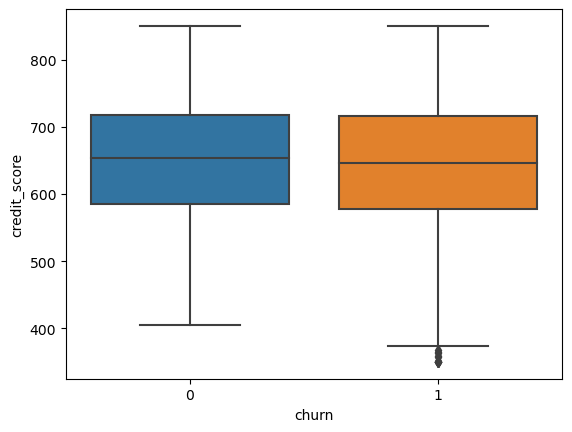

In [15]:
#Numerical hue
sns.boxplot(x=df['churn'],y=df['credit_score'])

When we look at the credit score variable, we can't see much difference between the scores and the chance of churn.

<Axes: xlabel='churn', ylabel='age'>

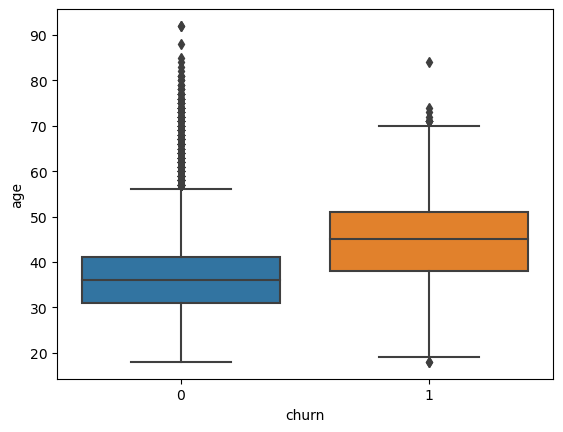

In [16]:
sns.boxplot(x=df['churn'],y=df['age'])

Older people are more likely to churn

<Axes: xlabel='churn', ylabel='balance'>

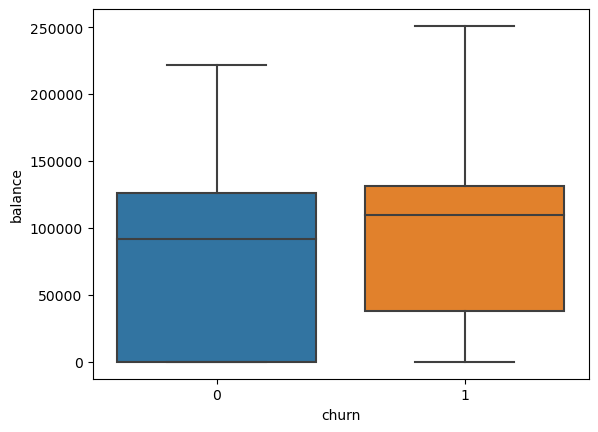

In [17]:
sns.boxplot(x=df['churn'],y=df['balance'])

There is no much difference between balance and chances of churn.

<Axes: xlabel='churn', ylabel='estimated_salary'>

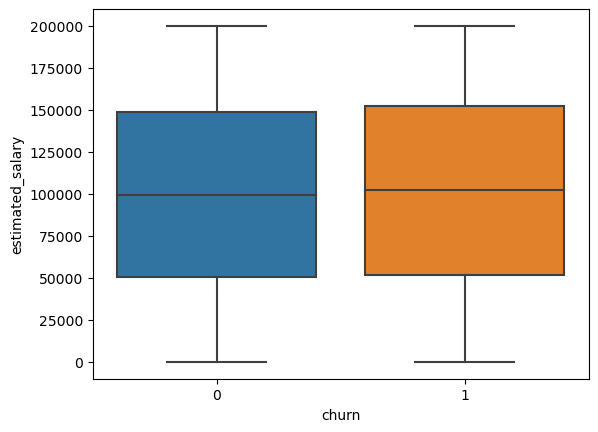

In [18]:
sns.boxplot(x=df['churn'],y=df['estimated_salary'])

There is no much difference between estimated salary and chances of churn.

In [19]:
X = df.iloc[:,0:10]
y = df.iloc[:,10]

In [20]:
#Handling Imbalanced Dataset using Ramdom Over Sampler
oversampler = RandomOverSampler()
X_over, y_over = oversampler.fit_resample(X,y)
X_over

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
15921,667,Germany,Female,37,5,92171.35,3,1,0,178106.34
15922,373,France,Male,42,7,0.00,1,1,0,77786.37
15923,538,Spain,Female,49,9,141434.04,1,0,0,173779.25
15924,698,Germany,Female,52,1,107906.75,1,1,0,168886.39


In [21]:
#Encoding of Categorical to Continuous Variable
X_over = pd.get_dummies(X_over)
X_over

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,667,37,5,92171.35,3,1,0,178106.34,0,1,0,1,0
15922,373,42,7,0.00,1,1,0,77786.37,1,0,0,0,1
15923,538,49,9,141434.04,1,0,0,173779.25,0,0,1,1,0
15924,698,52,1,107906.75,1,1,0,168886.39,0,1,0,1,0


In [22]:
# Scaling the features in the same range
col = ['credit_score','age','balance','estimated_salary']
mms = MinMaxScaler()
X_over[col] = mms.fit_transform(X_over[col])
X_over

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,0,0,1,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,0,1,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,0,0,1,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,1,0,0,1,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,0.634,0.256757,5,0.367366,3,1,0,0.890559,0,1,0,1,0
15922,0.046,0.324324,7,0.000000,1,1,0,0.388911,1,0,0,0,1
15923,0.376,0.418919,9,0.563711,1,0,0,0.868921,0,0,1,1,0
15924,0.696,0.459459,1,0.430082,1,1,0,0.844455,0,1,0,1,0


In [23]:
# Considering 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.2,random_state=0)

In [24]:
X_train.shape,y_train.shape

((12740, 13), (12740,))

In [25]:
X_test.shape,y_test.shape

((3186, 13), (3186,))

## Prediction with ML models

In [26]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.7040175768989329

In [27]:
model = SVC()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.7558066541117389

In [28]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.7925298179535468

In [29]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.911487758945386

In [30]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.9469554300062775

The Random Forest Classifier gives us the highest accuracy of 94.7%